# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.4 How does Adagrad works?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Fifth post (own_tutorial_5.ipynb).

> Previous post (own_tutorial_6.ipynb).

Adagrad stands for Adaptive Gradient. The idea is to store the square of gradients in an accumulator. The value of the accumulator is generally initialized as 0.1

And we calculate update as follow:

In [1]:
%%latex
\begin{gather*}
    update = - learning\_rate * \frac{gradient}{\sqrt{accumulator} + epsilon}
\end{gather*}

<IPython.core.display.Latex object>

This post is divided into 3 sections.

1. Adagrad in 1 variable

2. Adagrad animation for 1 variable

3. Adagrad in multi-variable function

## #1 Adagrad in 1 variable

In this method, we store the square of gradients in an accumulator which is initialized as 0.1

Adagrad algorithm in simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - Initiate accumulator = 0.1 and set epsilon = 10**-8

> Step 3 - Initiate loop

>          Step 3.1 - add square of gradients to accumulator

>          Step 3.2 - calculate update as stated above

>          Step 3.3 - add update to point

First, let us define the function and its derivative and we start from x = -1

In [2]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [3]:
import numpy as np
np.random.seed(42)
def f(x):                           # function definition                        
    return x - x**3
def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now Adagrad

In [4]:
point = -1                                   # step 1
learning_rate = 0.05

accumulator = 0.1                            # step 2
epsilon = 10**-8

for i in range(1000):                        # step 3
    accumulator += fdash(point)**2           # step 3.1

    update = - learning_rate * fdash(point) / (accumulator**0.5 + epsilon) # step 3.2

    point += update                          # step 3.3
    
point                                        # Minima

-0.5773502691896274

Note — Because we are storing the square of gradients in the accumulator, it gets big and big with time which slows the learning. So, the learning rate is slightly high.

And, we have successfully implemented Adagrad in Python

## #2 Adagrad animation for better understanding

Everything thing is the same as what we did earlier for the animation of the previous 3 optimizers. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter
point_adagrad = [-1]                      # initiating list with
                                          # starting point in it
point = -1                                # step 1
learning_rate = 0.05

accumulator = 0.1                         # step 2
epsilon = 10**-8

for i in range(1000):                     # step 3
    accumulator += fdash(point)**2        # step 3.1
    update = - learning_rate * fdash(point) / (accumulator**0.5 + epsilon)
                                          # step 3.2
    point += update                       # step 3.3
    
    point_adagrad.append(point)           # adding updated point to
                                          # the list
    
point                                     # Minima

-0.5773502691896274

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'Adagrad, learning_rate = 0.05')

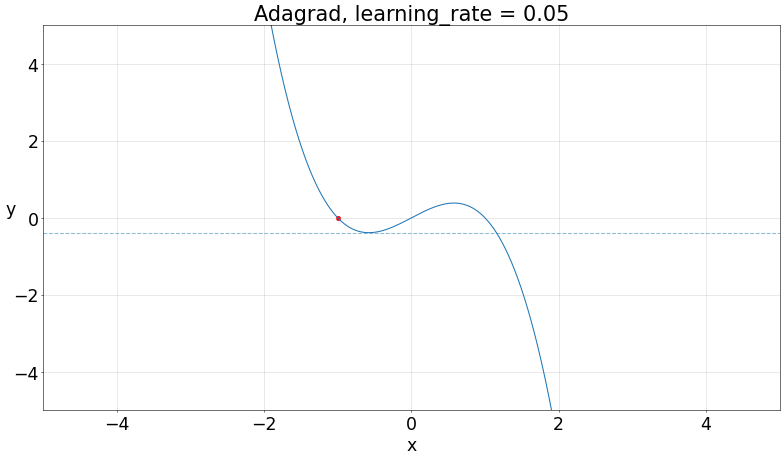

In [6]:
plt.rcParams.update({'font.size': 25})

fig = plt.figure(dpi = 50)

fig.set_figheight(10)
fig.set_figwidth(19)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()
ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red')
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('Adagrad, learning_rate = 0.05')

Now we will animate the Adagrad optimizer.

In [7]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.7)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('Adagrad, learning_rate = 0.05')
    
    ax.scatter(point_adagrad[i], f(point_adagrad[i]), color = 'red')

The last line in the code snippet above is using the iᵗʰ index value from the list for iᵗʰ frame in the animation.

In [8]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.4.GSD_Adagrad.gif')

## #3 Adagrad in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and accumulator = 0.1 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array



In [9]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [10]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64) 

Now the steps for Adagrad in 2 variables are

In [11]:
point = np.array([[   1   ],                      # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 0.05

accumulator = np.array([[   0.1   ],              # step 2
                        [   0.1   ]], dtype = np.float64)
epsilon = 10**-8

for i in range(1000):                             # step 3
    accumulator += gradient(point)**2             # step 3.1
    update = - learning_rate * gradient(point) / (accumulator**0.5 +
                                                         epsilon)
                                                  # step 3.2
    point += update                               # step 3.3
    
point                                             # Minima

array([[ 1.99990344],
       [-0.99990344]])

I hope now you understand Adagrad.